In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scienceplots
import scipy.stats as stats

plt.style.use('science')

In [6]:
df = pd.read_csv('przewodzenie.tsv', sep='\t')

In [7]:
df['log I'] = np.log(df['I [mA]'])
df

,I [mA],Ge,Si,light,Zenera,log I
0,0.1,0.0611,0.2508,1.5423,0.6630,-2.302585
1,0.2,0.0829,0.2828,1.5650,0.6869,-1.609438
2,0.3,0.0977,0.3009,1.5779,0.6995,-1.203973
3,0.5,0.1173,0.3233,1.5940,0.7148,-0.693147
4,0.7,0.1312,0.3380,1.6046,0.7246,-0.356675
5,1.0,0.1464,0.3533,1.6158,0.7347,0.000000
6,2.0,0.1775,0.3821,1.6379,0.7543,0.693147
7,3.0,0.1966,0.3993,1.6514,0.7656,1.098612
8,5.0,0.2216,0.4208,1.6697,0.7800,1.609438
9,7.0,0.2387,0.4355,1.6827,0.7899,1.945910


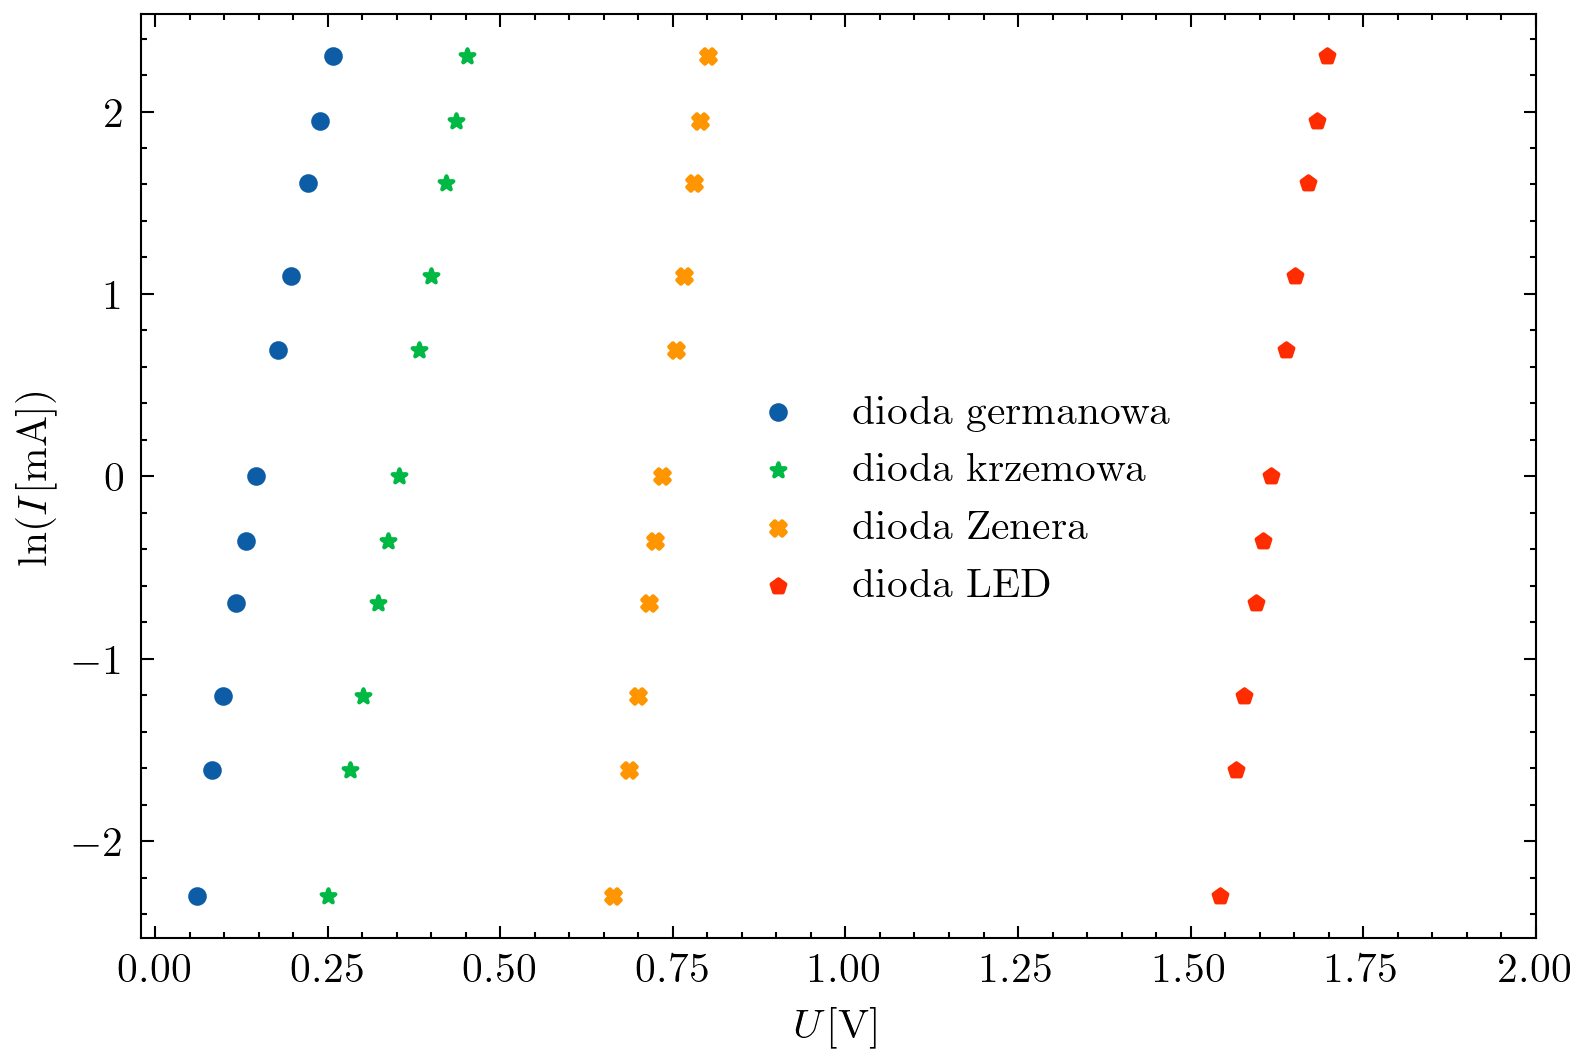

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
ax.scatter(df['Ge'], df['log I'], 12, label="dioda germanowa", marker='o')
ax.scatter(df['Si'], df['log I'], 12, label="dioda krzemowa", marker='*')
ax.scatter(df['Zenera'], df['log I'],12,   label="dioda Zenera ", marker='X')
ax.scatter(df['light'], df['log I'], 12,  label="dioda LED", marker='p')
ax.legend(bbox_to_anchor=(0.40, 0.63), loc="upper left")
ax.set_xlabel(r'$U [\text{V}]$')
ax.set_ylabel(r'$\ln (I [\text{mA}])$')
_ = ax.set_xticks(np.arange(0, 2.2, 0.25))

In [9]:
results = stats.linregress(x=df['Si'], y=df['log I'])
results

LinregressResult(slope=23.194702729248164, intercept=-8.168805878029136, rvalue=0.999888535389376, pvalue=9.538096684108738e-18, stderr=0.11544825269789442, intercept_stderr=0.04195541326847732)

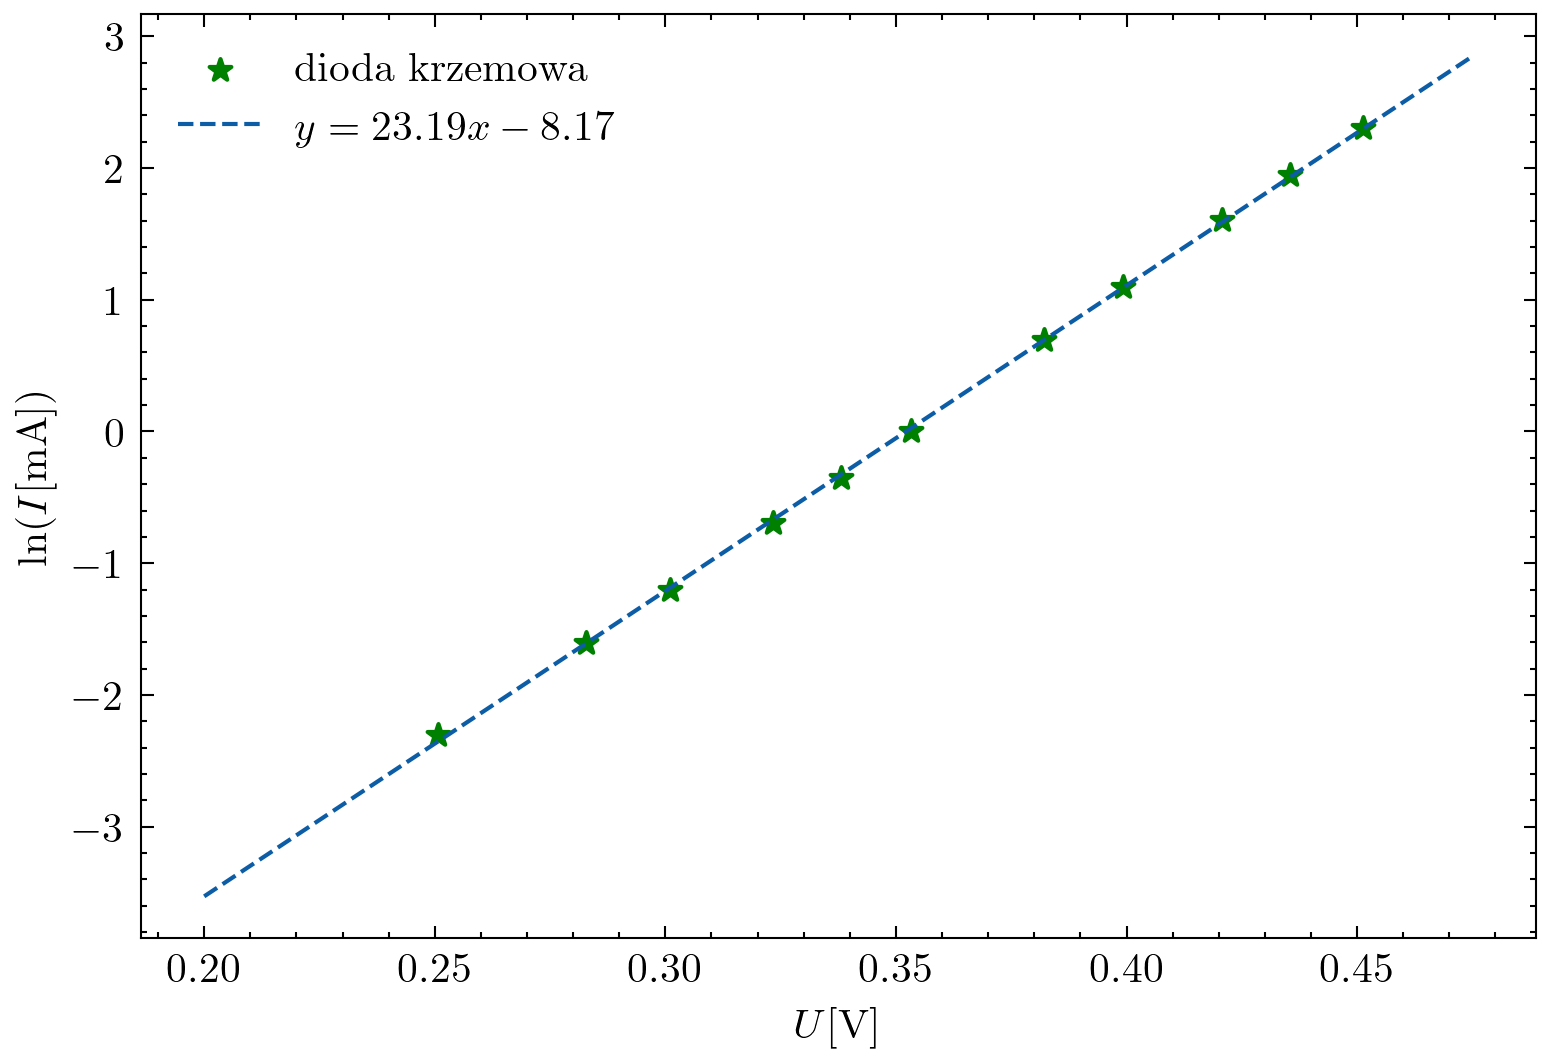

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
ax.scatter(df['Si'], df['log I'], 30, label="dioda krzemowa", marker='*', color='green')
x = np.linspace(0.200, 0.475, 100)
ax.plot( x, results.slope*x + results.intercept ,  linestyle='dashed' , label=f'$ y = {results.slope:.2f}x  {results.intercept:.2f} $')

ax.set_xlabel(r'$U [\text{V}]$')
ax.set_ylabel(r'$\ln (I [\text{mA}])$')
ax.legend()
_ = ax.set_xticks(np.arange(0.200, 0.475, 0.050))

In [11]:
params = {
    'a': results.slope,
    'u(a)': results.stderr,
    'u_T' : 26e-3,
    'u(T)': 2,
}

params['u(u_T)']= abs(1.381/1.602 * 10**(-4) * params['u(T)'] )
params

{'a': 23.194702729248164,
 'u(a)': 0.11544825269789442,
 'u_T': 0.026,
 'u(T)': 2,
 'u(u_T)': 0.00017240948813982521}

In [12]:
params['m'] = 1/params['a'] / params['u_T']
params['m']

1.65820355235849

In [13]:
params['u(m)'] = np.sqrt(
    (1/params['a']**2/params['u_T']  * params['u(a)'])**2  + 
    (1/params['u_T']**2/params['a']  * params['u(u_T)'])**2
)
params

{'a': 23.194702729248164,
 'u(a)': 0.11544825269789442,
 'u_T': 0.026,
 'u(T)': 2,
 'u(u_T)': 0.00017240948813982521,
 'm': 1.65820355235849,
 'u(m)': 0.013748697121304408}

In [14]:
(df.loc[10, 'light'] - df.loc[ 10, 'Si']) + 1.11

2.3568

In [15]:
zp=pd.read_csv('zaporowy.tsv', sep='\t')
zp

,Ge U[V],Ge I[uA],Si U[V],Si I[uA],light I[uA],Zener I [mA],Zener U[V]
0,0.02,6.21,0.1,0.40,0.16,0.1,1.381
1,0.04,10.18,0.2,0.44,0.16,0.2,1.531
2,0.06,12.63,0.3,0.46,0.16,0.3,1.628
3,0.08,13.65,0.5,0.50,0.16,0.5,1.757
4,0.10,14.42,0.7,0.52,0.16,0.7,1.849
5,0.20,14.91,1.0,0.55,0.16,1.0,1.954
6,0.30,15.04,1.5,0.59,0.16,1.5,2.086
7,0.50,15.52,2.0,0.63,0.16,2.0,2.189
8,0.70,16.01,3.0,0.68,0.16,3.0,2.353
9,1.00,16.34,4.0,0.72,0.17,4.0,2.486


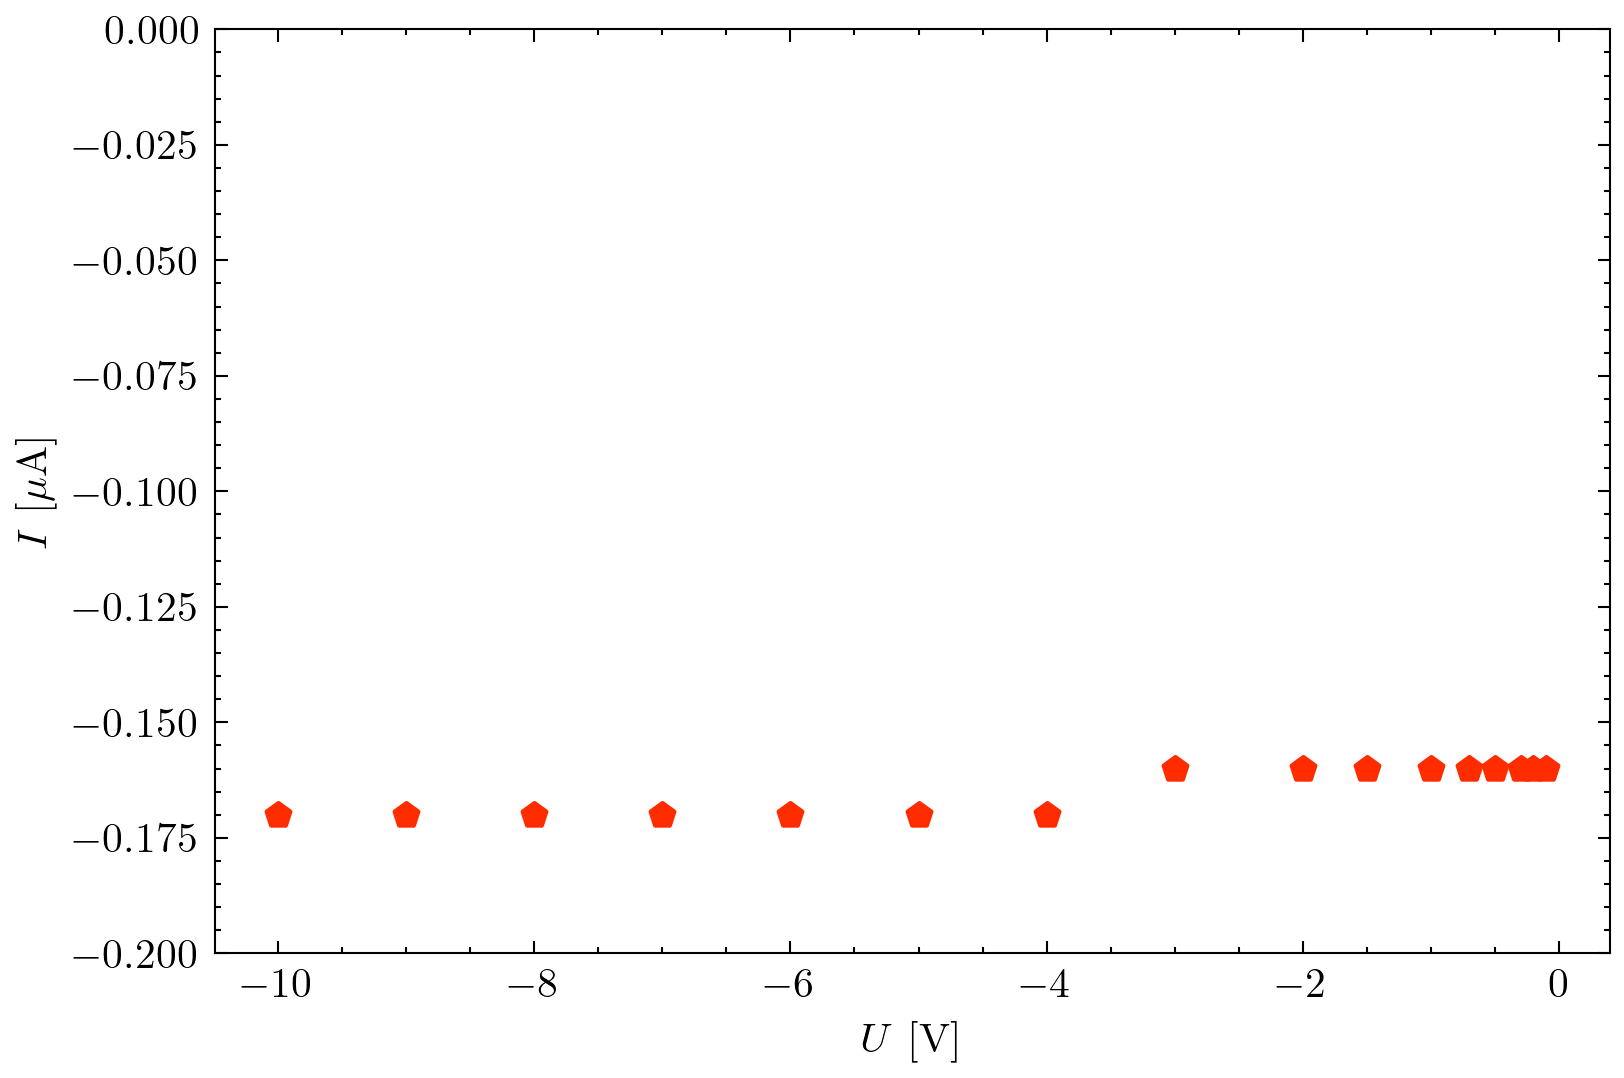

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
# ax.scatter(-zp['Ge U[V]'], -zp['Ge I[uA]'], 12, label="dioda germanowa", marker='o')
# ax.scatter(-zp['Zener U[V]'], -zp['Zener I [mA]'], 12, label="dioda krzemowa", marker='*')
# ax.scatter(df['Si'], df['log I'], 12, label="dioda krzemowa", marker='*')
# ax.scatter(df['Zenera'], df['log I'],12,   label="dioda Zenera ", marker='X')
# ax.scatter(df['light'], df['log I'], 12,  label="dioda LED", marker='p')
# ax.legend(bbox_to_anchor=(0.40, 0.63), loc="upper left")

# ax.scatter(-zp['Ge U[V]'], -zp['Ge I[uA]'], marker='o', color='C0')
# ax.set_ylim((-19, 0))


# ax.scatter(-zp['Si U[V]'], -zp['Si I[uA]'], marker='*', color='C1')
# ax.set_ylim((-1, 0))


ax.scatter(-zp['Si U[V]'], -zp['light I[uA]'], marker='p', color='C3' )
ax.set_ylim((-0.2, 0))


# ax.scatter(-zp['Zener U[V]'], -zp['Zener I [mA]'], marker='X', color='C2')
# ax.set_ylim((-11, 0))

ax.set_xlabel(r'$U$ [V]')
ax.set_ylabel(r'$I$ [$\mu$A]')
# ax.set_ylim((-10, ))
# ax.grid()

# _ = ax.set_xticks(np.arange(0, 2.2, 0.25))


# fig.savefig('zaporowy_ge.png')
# fig.savefig('zaporowy_si.png')
fig.savefig('zaporowy_light.png')
# fig.savefig('zaporowy_zen.png')